In [31]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
mt5.initialize()

True

In [33]:
mt5.login(98612198, "@6IdVxTg", "MetaQuotes-Demo")

True

In [34]:
# Fetch Historical Data
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_H1
num_bars = 300

rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, num_bars)

In [35]:
# Convert rates to Pandas DataFrame

df = pd.DataFrame(rates)
df["time"] = pd.to_datetime(df["time"], unit="s")

In [36]:
df.head(10)

,time,open,high,low,close,tick_volume,spread,real_volume
0,2025-10-20 20:00:00,1.16499,1.16532,1.16411,1.16437,1409,2,0
1,2025-10-20 21:00:00,1.16436,1.16487,1.16384,1.16466,1340,2,0
2,2025-10-20 22:00:00,1.16467,1.16494,1.16396,1.16411,996,2,0
3,2025-10-20 23:00:00,1.16403,1.16443,1.16392,1.16404,792,4,0
4,2025-10-21 00:00:00,1.16389,1.16445,1.16369,1.16439,481,12,0
5,2025-10-21 01:00:00,1.16440,1.16450,1.16418,1.16422,485,4,0
6,2025-10-21 02:00:00,1.16430,1.16455,1.16423,1.16441,564,2,0
7,2025-10-21 03:00:00,1.16440,1.16553,1.16432,1.16530,1272,2,0
8,2025-10-21 04:00:00,1.16529,1.16531,1.16419,1.16452,1317,2,0
9,2025-10-21 05:00:00,1.16453,1.16453,1.16325,1.16340,1411,2,0


In [37]:
# Compute SMAs

df["SMA_9"] = df["close"].rolling(window=9).mean()
df["SMA_21"] = df["close"].rolling(window=21).mean()

In [38]:
df.head(10)

,time,open,high,low,close,tick_volume,spread,real_volume,SMA_9,SMA_21
0,2025-10-20 20:00:00,1.16499,1.16532,1.16411,1.16437,1409,2,0,NaN,NaN
1,2025-10-20 21:00:00,1.16436,1.16487,1.16384,1.16466,1340,2,0,NaN,NaN
2,2025-10-20 22:00:00,1.16467,1.16494,1.16396,1.16411,996,2,0,NaN,NaN
3,2025-10-20 23:00:00,1.16403,1.16443,1.16392,1.16404,792,4,0,NaN,NaN
4,2025-10-21 00:00:00,1.16389,1.16445,1.16369,1.16439,481,12,0,NaN,NaN
5,2025-10-21 01:00:00,1.16440,1.16450,1.16418,1.16422,485,4,0,NaN,NaN
6,2025-10-21 02:00:00,1.16430,1.16455,1.16423,1.16441,564,2,0,NaN,NaN
7,2025-10-21 03:00:00,1.16440,1.16553,1.16432,1.16530,1272,2,0,NaN,NaN
8,2025-10-21 04:00:00,1.16529,1.16531,1.16419,1.16452,1317,2,0,1.164447,NaN
9,2025-10-21 05:00:00,1.16453,1.16453,1.16325,1.16340,1411,2,0,1.164339,NaN


In [39]:
# Determine the most recent signal

latest = df.iloc[-1]
print(latest)

time           2025-11-06 09:00:00
open                       1.15066
high                       1.15135
low                        1.15065
close                      1.15128
tick_volume                    936
spread                           1
real_volume                      0
SMA_9                     1.150567
SMA_21                    1.149407
Name: 299, dtype: object


In [40]:
if latest["SMA_9"] > latest["SMA_21"]:
    signal = "BUY"
else:
    signal = "SELL"

print(f"Latest Signal for {symbol}: {signal}")

Latest Signal for EURUSD: BUY


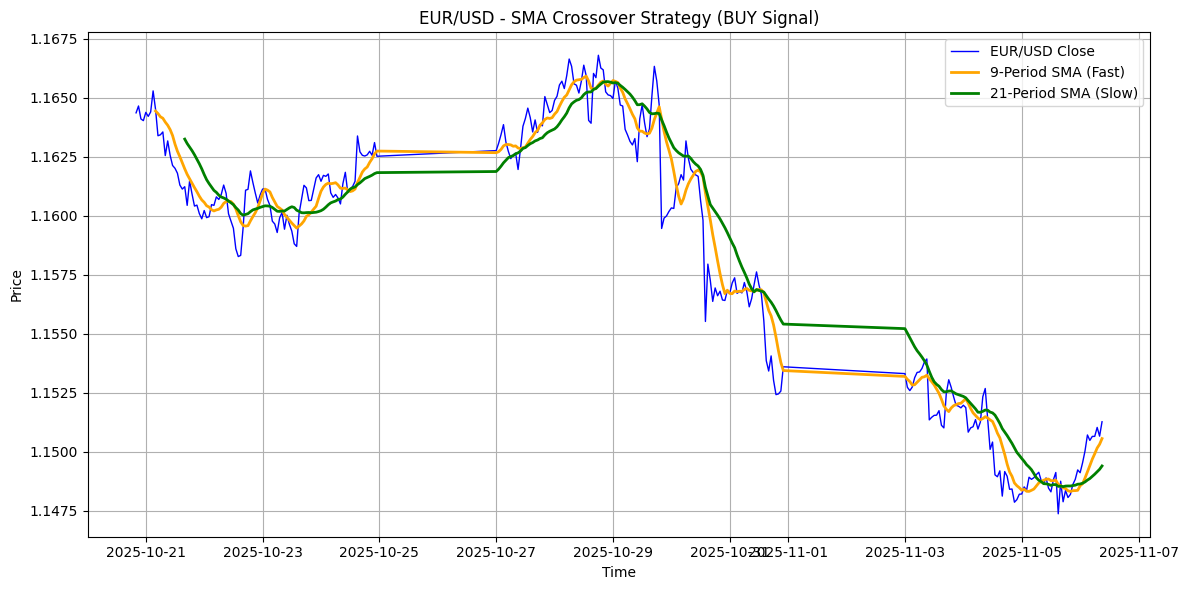

In [41]:
# Plot the chart
plt.figure(figsize=(12, 6))
plt.plot(df["time"], df["close"], label="EUR/USD Close", color="blue", linewidth=1)
plt.plot(df["time"], df["SMA_9"], label="9-Period SMA (Fast)", color="orange", linewidth=2)
plt.plot(df["time"], df["SMA_21"], label="21-Period SMA (Slow)", color="green", linewidth=2)

plt.title(f"EUR/USD - SMA Crossover Strategy ({signal} Signal)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()